In [73]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
dataset = pd.read_csv(r"/Users/anusreereddysama/Desktop/TECHWORKS/week-9/week-9(2nd-day)/car_task/CarPrice_Assignment.csv")
 
# Independent variable (Position Level)
X = dataset.iloc[:, 16:17].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values

# Display dataset preview
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  p

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
print("✅ Models Trained Successfully!")
 

✅ Models Trained Successfully!


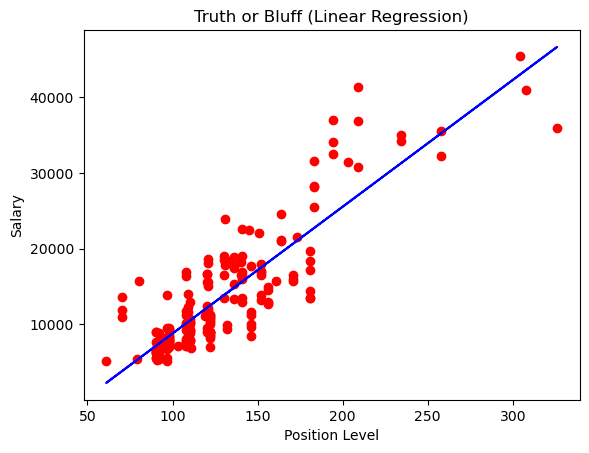

In [45]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

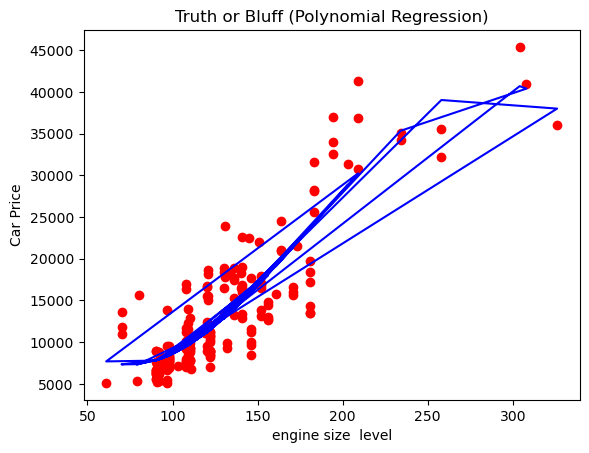

In [46]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('engine size  level')
plt.ylabel('Car Price')
plt.show()

/var/folders/22/x7v1_1017xg03qk5zzm7x5j40000gn/T/ipykernel_3400/3621967135.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


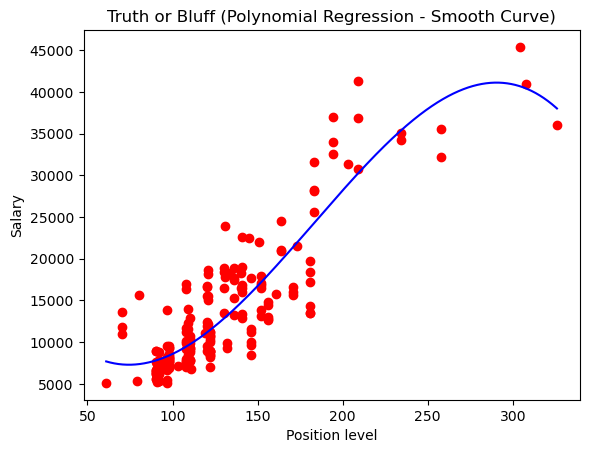

In [24]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [26]:
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[200]])
print("Linear Regression Prediction for engine size  200:", linear_prediction)

Linear Regression Prediction for engine size  200: [25534.23774749]


In [25]:
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[200]]))
print("Polynomial Regression Prediction for engine size  200:", poly_prediction)

Polynomial Regression Prediction for engine size  200: [28205.13188796]


<Axes: >

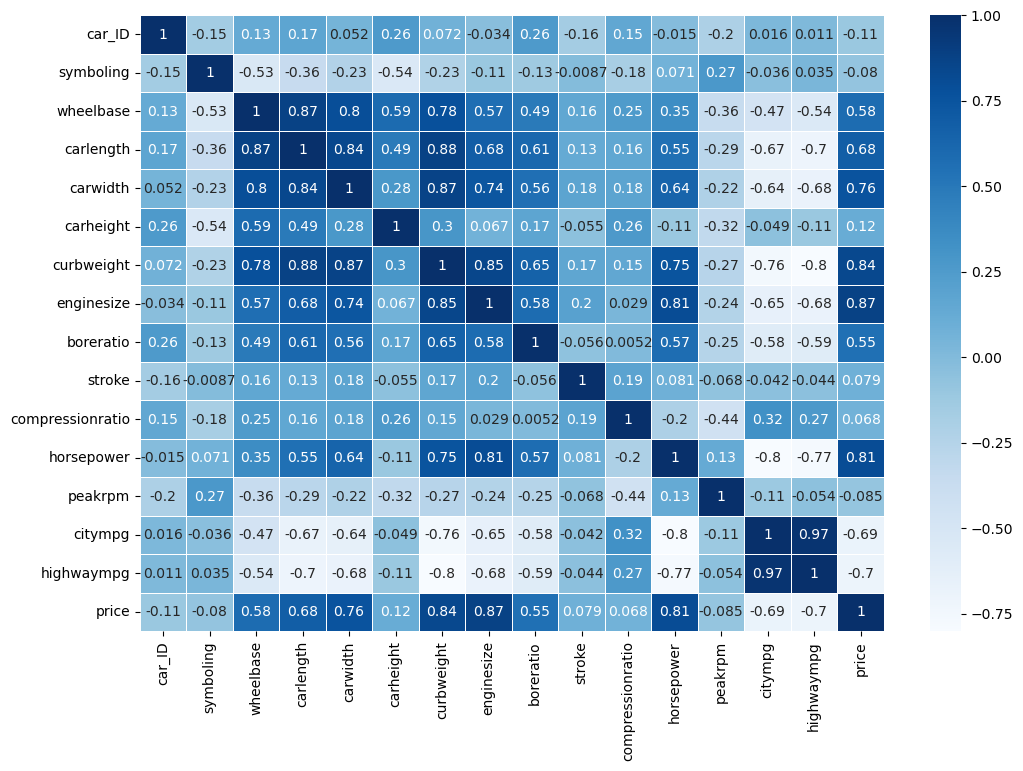

In [57]:
import seaborn as sns

numeric_cols=dataset.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='Blues',linewidths=0.5)

- compressionratio ,stroke values are less than 0.1 (weak positively correlated features)
-  

In [ ]:
target = "price"

target_corr = corr_matrix[target].sort_values(ascending=False)

print("Top positive correlations with target:")
print(target_corr[target_corr > 0].drop(target))

print("\nTop negative correlations with target:")
print(target_corr[target_corr < 0])

Top positive correlations with target:
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

Top negative correlations with target:
symboling    -0.079978
peakrpm      -0.085267
car_ID       -0.109093
citympg      -0.685751
highwaympg   -0.697599
Name: price, dtype: float64


<Axes: >

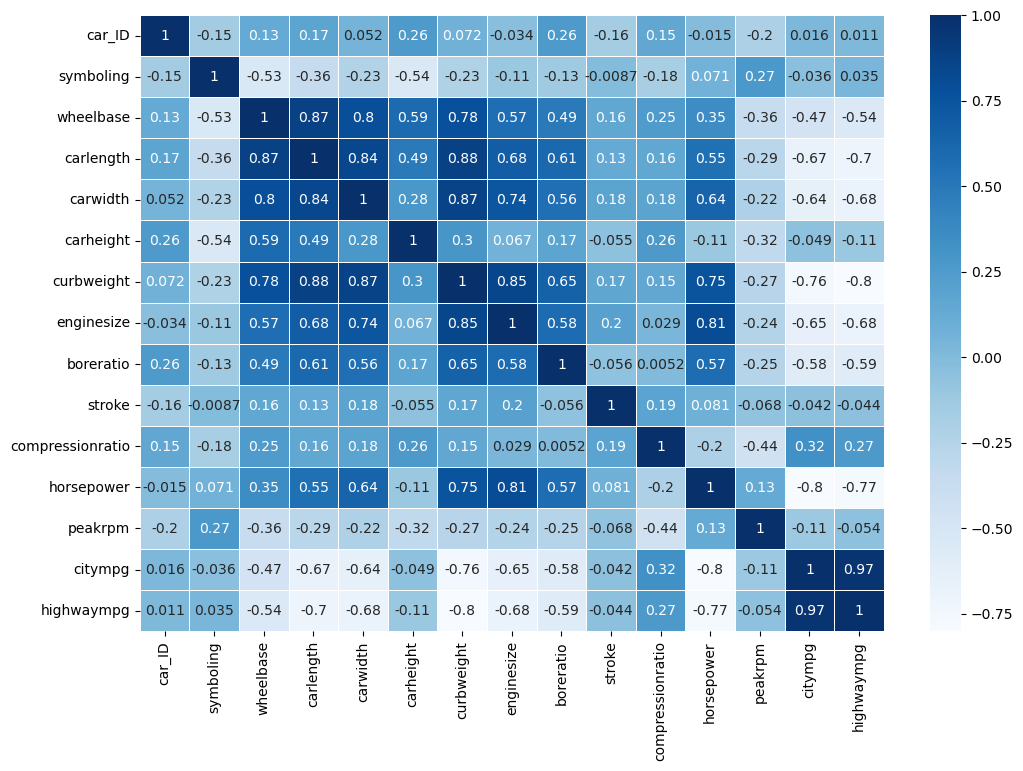

In [61]:
numeric_cols=dataset.select_dtypes(include='number')
new=numeric_cols.drop(columns='price')
corr_matrix = new.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='Blues',linewidths=0.5)

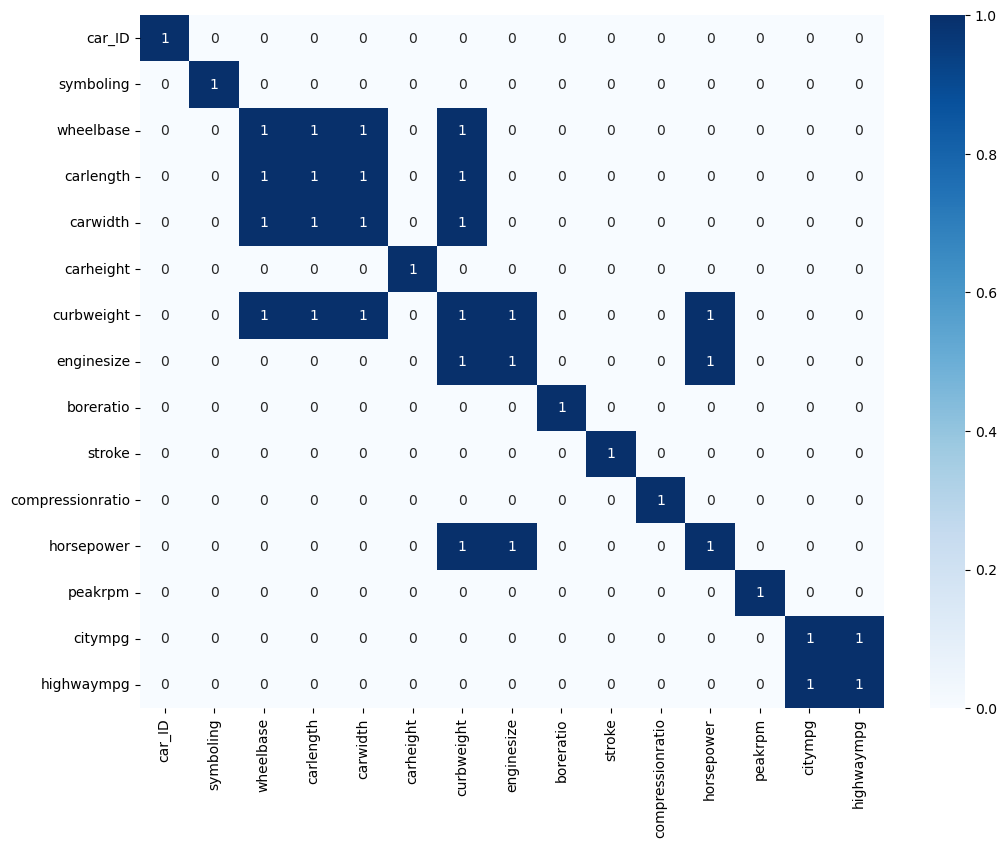

In [66]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(new.corr(numeric_only=True)>0.75, annot=True,cmap='Blues')
plt.show()

In [71]:
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Keep correlations above 0.75
high_corr_pairs = corr_pairs[corr_pairs > 0.75]

# Remove duplicate pairs (matrix is symmetric)
high_corr_pairs = high_corr_pairs.drop_duplicates()

# Display
print("Highly correlated feature pairs (|corr| > 0.75):")
print(high_corr_pairs)

Highly correlated feature pairs (|corr| > 0.75):
wheelbase   carlength     0.874587
            carwidth      0.795144
            curbweight    0.776386
carlength   carwidth      0.841118
            curbweight    0.877728
carwidth    curbweight    0.867032
curbweight  enginesize    0.850594
            horsepower    0.750739
enginesize  horsepower    0.809769
citympg     highwaympg    0.971337
dtype: float64


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     
    random_state=42     
)


In [101]:
from sklearn.linear_model import Ridge

model_r = Ridge(alpha=10)
model_r.fit(X, y)

# predict for a sample engine size (e.g., 200)
ridge_prediction = model_r.predict([[200]])
print("Ridge Regression Prediction for engine size 200:", ridge_prediction)


Ridge Regression Prediction for engine size 200: [25533.8912638]


In [94]:
from sklearn.linear_model import Lasso

model_l = Lasso(alpha=10)
model_l.fit(X, y)

# predict for a sample engine size (e.g., 200)
lasso_p = model_l.predict([[200]])
print("Lasso Regression Prediction for engine size 200:", lasso_p)

Lasso Regression Prediction for engine size 200: [25533.81418258]


In [128]:

 
from sklearn.linear_model import RidgeCV
import numpy as np
alphas=np.arange(0.1,10,0.05)
model=RidgeCV(alphas=alphas)

model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 9.950000000000003
best score:  0.8040933847321264


In [127]:
from sklearn.linear_model import LassoCV
import numpy as np

alphas=np.arange(0.1,10,0.05)
model=LassoCV(alphas=alphas)

model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 9.950000000000003
best score:  0.8040934124003777
